In [1]:
import matplotlib.pyplot as plt  # for plotting graphs
# import required python libraries
import pandas as pd
import seaborn as sns

%matplotlib inline

# load set in to Pandas dataframe
df = pd.read_csv('./data/survey_results_public-2019.csv')
schema_df = pd.read_csv('./data/survey_results_schema-2019.csv')
# preview head of the dataset
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
schema_df.values

array([['Respondent',
        'Randomized respondent ID number (not in order of survey response time)'],
       ['MainBranch',
        'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'],
       ['Hobbyist', 'Do you code as a hobby?'],
       ['OpenSourcer', 'How often do you contribute to open source?'],
       ['OpenSource',
        'How do you feel about the quality of open source software (OSS)?'],
       ['Employment',
        'Which of the following best describes your current employment status?'],
       ['Country', 'In which country do you currently reside?'],
       ['Student',
        'Are you currently enrolled in a formal, degree-granting college or university program?'],
       ['EdLevel',
        'Which of the following best describes the highest level of formal education that you’ve completed?'],
       ['UndergradMajor',
        'What was your main or most important field of study?'],
       ['EduOther',
  

In [3]:
df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [4]:
df['JobSat'].dropna(axis=0).values

array(['Slightly satisfied', 'Slightly satisfied',
       'Slightly dissatisfied', ..., 'Neither satisfied nor dissatisfied',
       'Very dissatisfied', 'Slightly dissatisfied'], dtype=object)

Text(0, 0.5, 'Number of Respondents')

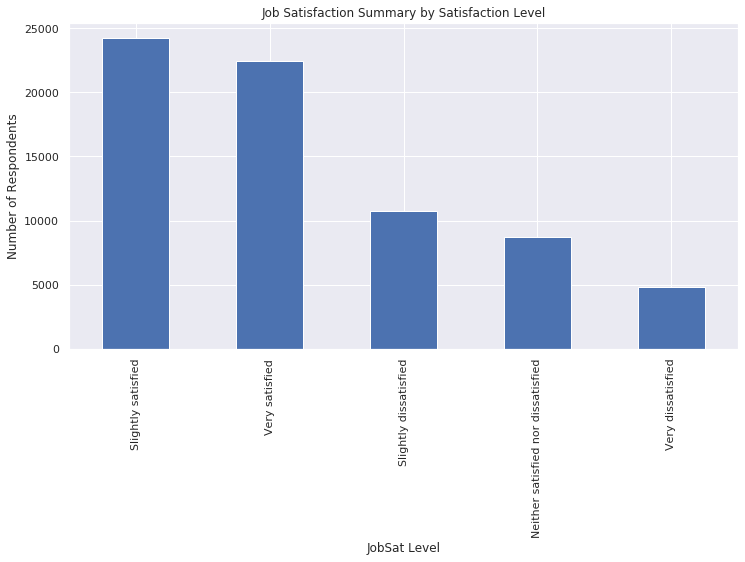

In [5]:
sns.set(font_scale=1)
df['JobSat'].value_counts().plot.bar(figsize=(12, 6))
plt.title('Job Satisfaction Summary by Satisfaction Level')
plt.xlabel('JobSat Level')
plt.ylabel('Number of Respondents') 

In [6]:
job_sat_vals = ['Slightly satisfied','Very satisfied']
job_dis_sat_vals = ['Slightly dissatisfied','Very dissatisfied']

In [7]:
most_job_sat_df = df.copy()[(df['JobSat'] == job_sat_vals[0] ) | (df['JobSat'] == job_sat_vals[1])]
un_sat_df = df.copy()[(df['JobSat'] == job_dis_sat_vals[0] ) | (df['JobSat']== job_dis_sat_vals[1])]

In [8]:
def merge_sat_and_dsat_by_cols(col):
    most_job_sat_col_df = most_job_sat_df.groupby([col]).size().sort_values(ascending=False).reset_index(name='SatCount')
    least_job_sat_col_df = un_sat_df.groupby([col]).size().sort_values(ascending=False).reset_index(name='DisSatCount')
    return pd.merge(most_job_sat_col_df, least_job_sat_col_df , on=col)


In [9]:
merged_edl_df = merge_sat_and_dsat_by_cols('EdLevel')

In [10]:
def calculate_sat_and_dsat_pecentage(merged_df):
    merged_df['SatPercentage'] = merged_df['SatCount'] / (merged_df['SatCount']+merged_df['DisSatCount']) 
    merged_df['SatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['SatPercentage']], index = merged_df.index)
    
    merged_df['DisSatPercentage'] = merged_df['DisSatCount'] / (merged_df['SatCount']+merged_df['DisSatCount'])
    merged_df['DisSatPercentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in merged_df['DisSatPercentage']], index = merged_df.index)
    
    return merged_df.sort_values(by='SatPercentage', ascending=False).reset_index(drop=True)

In [11]:
calculate_sat_and_dsat_pecentage(merged_edl_df)

,EdLevel,SatCount,DisSatCount,SatPercentage,DisSatPercentage
0,"Other doctoral degree (Ph.D, Ed.D., etc.)",1592,395,80.12%,19.88%
1,"Secondary school (e.g. American high school, G...",2433,702,77.61%,22.39%
2,Associate degree,1537,476,76.35%,23.65%
3,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",11805,3849,75.41%,24.59%
4,Some college/university study without earning ...,5252,1734,75.18%,24.82%
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",22297,7691,74.35%,25.65%
6,Primary/elementary school,220,93,70.29%,29.71%
7,"Professional degree (JD, MD, etc.)",565,287,66.31%,33.69%
8,I never completed any formal education,178,94,65.44%,34.56%


In [12]:
merged_unmajor_df = merge_sat_and_dsat_by_cols('UndergradMajor')

In [13]:
calculate_sat_and_dsat_pecentage(merged_unmajor_df)


,UndergradMajor,SatCount,DisSatCount,SatPercentage,DisSatPercentage
0,"A social science (ex. anthropology, psychology...",808,211,79.29%,20.71%
1,"A health science (ex. nursing, pharmacy, radio...",145,40,78.38%,21.62%
2,"A natural science (ex. biology, chemistry, phy...",1982,557,78.06%,21.94%
3,Mathematics or statistics,1745,501,77.69%,22.31%
4,"A humanities discipline (ex. literature, histo...",945,288,76.64%,23.36%
5,"A business discipline (ex. accounting, finance...",997,304,76.63%,23.37%
6,Fine arts or performing arts (ex. graphic desi...,721,231,75.74%,24.26%
7,"Computer science, computer engineering, or sof...",26938,9079,74.79%,25.21%
8,"Another engineering discipline (ex. civil, ele...",3480,1236,73.79%,26.21%
9,Web development or web design,1696,632,72.85%,27.15%


In [14]:
age_range_labels = ['Range(Years) 15-24', 'Range(Years) 25-34','Range(Years) 35-44','Range(Years) 45-54','Range(Years) 55-64']
most_job_sat_df.loc[:,'AgeRange'] = pd.cut(most_job_sat_df['Age'], bins=[14, 24, 34, 44, 54, 64], labels=age_range_labels)
un_sat_df.loc[:,'AgeRange'] = pd.cut(un_sat_df['Age'], bins=[14, 24, 34, 44, 54, 64],labels=age_range_labels)

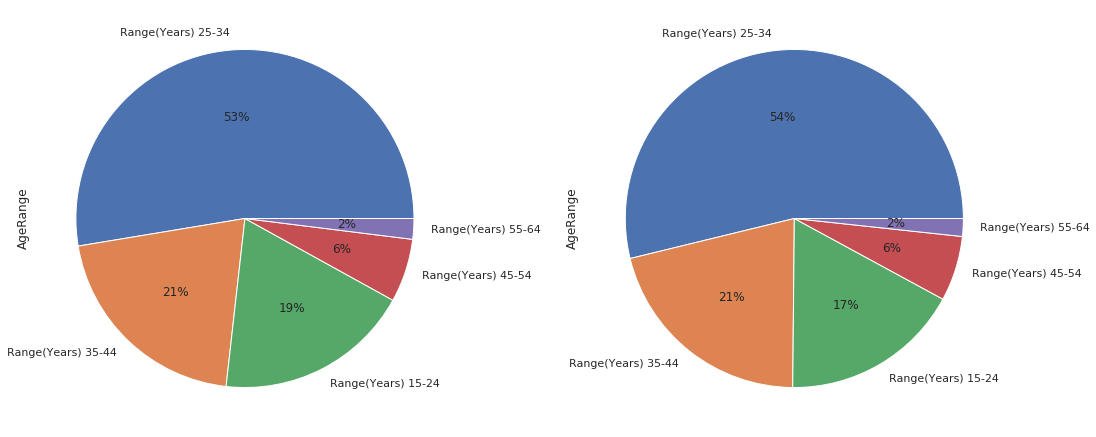

In [15]:
fig ,axs = plt.subplots(1,2, figsize=(15, 15))
most_job_sat_df['AgeRange'].value_counts().plot(kind='pie', ax=axs.flatten()[0], autopct='%1.0f%%')
un_sat_df['AgeRange'].value_counts().plot(kind='pie', ax=axs.flatten()[1], autopct='%1.0f%%')
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

Text(0.5, 1.0, 'Least Job Satisfaction')

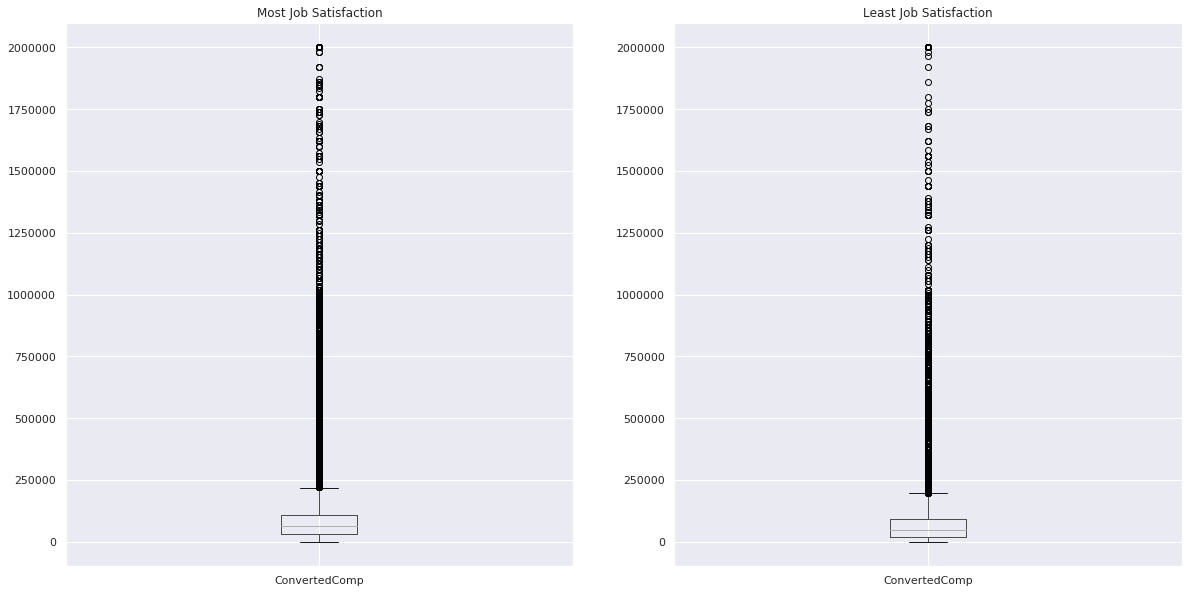

In [16]:
#before removing outliers
fig, axs = plt.subplots(1,2, figsize=(20,10))
most_job_sat_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Most Job Satisfaction')
un_sat_df.boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Least Job Satisfaction')

Text(0.5, 1.0, 'Least Job Satisfaction')

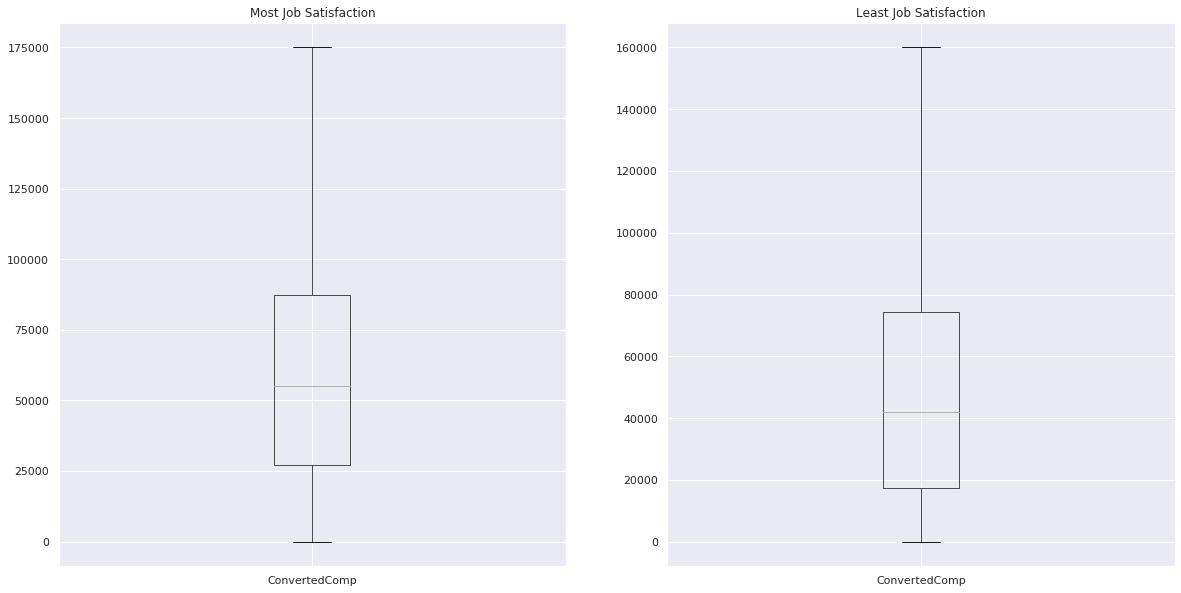

In [17]:
# after removing outliers
fig, axs = plt.subplots(1,2, figsize=(20,10))

most_job_sat_df[most_job_sat_df['ConvertedComp'] <= 175000].boxplot(column=['ConvertedComp'], ax=axs.flatten()[0])
axs[0].set_title('Most Job Satisfaction')
un_sat_df[un_sat_df['ConvertedComp'] <= 160000].boxplot(column=['ConvertedComp'], ax=axs.flatten()[1])
axs[1].set_title('Least Job Satisfaction')

In [18]:
# salary ranges wise grouping
salary_range_labels = ['Range($) 25K-50K', 'Range($) 50K-75K','Range($) 75K-100K','Range($) 100K-125K','Range($) 125K-150K', 'Range($) 150K-175K']
salary_bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000]
most_job_sat_df.loc[:,'ConvertedCompRange'] = pd.cut(most_job_sat_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)
un_sat_df.loc[:,'ConvertedCompRange'] = pd.cut(un_sat_df['ConvertedComp'], bins=salary_bins, labels=salary_range_labels)


In [19]:
merged_salary_range_df = merge_sat_and_dsat_by_cols('ConvertedCompRange')
merged_salary_range_df

,ConvertedCompRange,SatCount,DisSatCount
0,Range($) 25K-50K,7379,2651
1,Range($) 50K-75K,7154,2109
2,Range($) 75K-100K,4837,1327
3,Range($) 100K-125K,2923,752
4,Range($) 125K-150K,2013,498
5,Range($) 150K-175K,987,252


In [20]:
calculate_sat_and_dsat_pecentage(merged_salary_range_df)

,ConvertedCompRange,SatCount,DisSatCount,SatPercentage,DisSatPercentage
0,Range($) 125K-150K,2013,498,80.17%,19.83%
1,Range($) 150K-175K,987,252,79.66%,20.34%
2,Range($) 100K-125K,2923,752,79.54%,20.46%
3,Range($) 75K-100K,4837,1327,78.47%,21.53%
4,Range($) 50K-75K,7154,2109,77.23%,22.77%
5,Range($) 25K-50K,7379,2651,73.57%,26.43%


Text(0, 0.5, 'Number of Respondents')

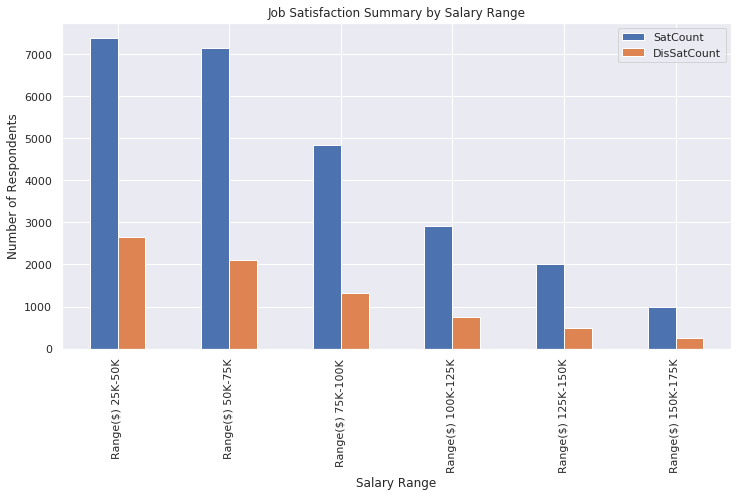

In [21]:
sns.set(font_scale=1)
merged_salary_range_df.index = salary_range_labels
merged_salary_range_df.plot.bar(figsize=(12, 6))
plt.title('Job Satisfaction Summary by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Number of Respondents') 
# plt.figure()